___

<center> <h1> BANK REVIEW/COMPLAINT ANALYSIS

### BUSINESS CONTEXT : 

Central Banks collecting information about customer satisfaction with the services provided by different bank. Also collects the information about the complaints.

- Bank users give ratings and write reviews about services on central bank websites. These reviews and ratings help to banks evaluate services provided and take neccesory action to improve customer services. While ratings are useful to convey the overall experience, they do not convey the context which led a reviewer to that experience.

- If we look at only the rating , it is difficult to guess why the user rated the service as 4 star. However after reading the review it is not difficult to identify that the review talks about the good 'service' and 'expectations'.

## BUSINESS PROBELEM :

> The objective of this case study is to analyze customer reviews and predict customer satisfaction with the reviews.

___

#### IMPORTING REQUIRED LIBRARIES

In [42]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# text preprocessing
import re
import nltk
import string
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# parameters
plt.rcParams['axes.grid'] = False
plt.rcParams['figure.figsize'] = 10, 7.5

# warnings
import warnings
warnings.filterwarnings('ignore')

#### IMPORTING THE DATASET

In [2]:
bank_reviews = pd.read_excel('BankReviews.xlsx')

___

## DATA AUDIT

In [3]:
# first five rows of the dataset
bank_reviews.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [4]:
# last five rows of the dataset
bank_reviews.tail()

,Date,Stars,Reviews,BankName
500,2016-02-06,1,\r\nI never write reviews but had to this time...,North American Savings Bank
501,2016-07-25,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank
502,2017-09-27,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank
503,2017-12-24,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank
504,2017-03-19,1,\r\nI was working with a loan consultant from ...,North American Savings Bank


In [5]:
# shape of the dataset
bank_reviews.shape

(505, 4)

In [6]:
# columns in the dataset
bank_reviews.columns

Index(['Date', 'Stars', 'Reviews', 'BankName'], dtype='object')

In [7]:
# a concise summary of the dataset
bank_reviews.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Date        datetime64[ns]
Stars       int64
Reviews     object
BankName    object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


> The dataset has **505 entries** and total **4 columns**. One is of date type, one is of int type and two are of object type.

In [8]:
# number of missing values in the dataset
bank_reviews.isna().sum()

Date        0
Stars       0
Reviews     0
BankName    0
dtype: int64

> There are **no missing values** in the dataset

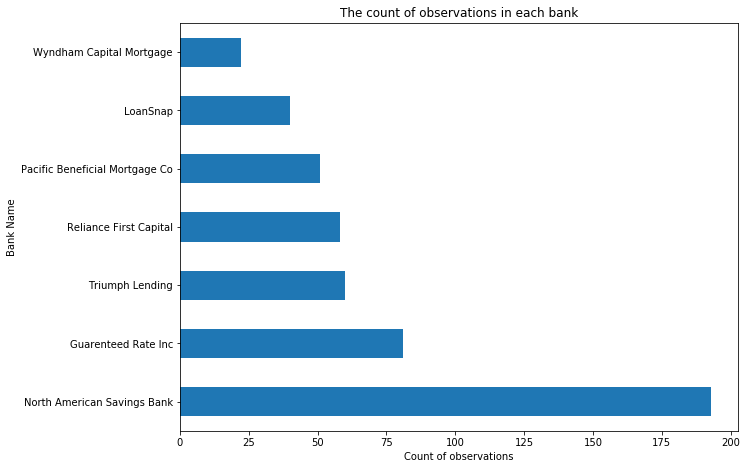

In [43]:
# the graphical representation of the count of observations in each bank using bars.
bank_reviews.BankName.value_counts().plot.barh(subplots=True)
plt.title('The count of observations in each bank')
plt.xlabel('Count of observations')
plt.ylabel('Bank Name')
plt.show()

> 'North American Savings Bank' has the **highest number of reviews** whereas 'Wyndham Capital Mortgage' has the **lowest**.

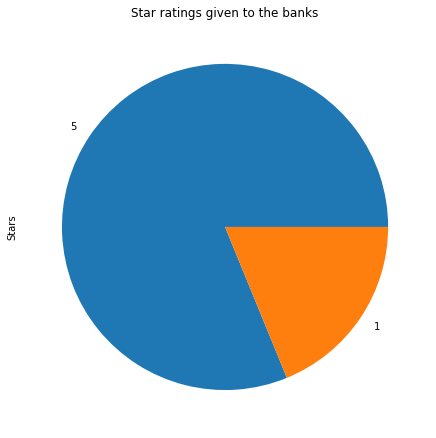

In [44]:
# graphical representation of star ratings given to the banks
bank_reviews.Stars.value_counts().plot(kind='pie', subplots=True)
plt.title('Star ratings given to the banks')
plt.show()

> There are two types of **ratings** given to the bank either **five** or **one** where five means the best and one means the worst.

___

## TEXT PREPROCESSING

In [11]:
# since date' won't play any role in text mining. Hence, dropping these two variables.
bank_reviews = bank_reviews.drop(columns=['Date'])

* <h3> TEXT CLEANING

In [12]:
# cleaning 'reviews' column to find the right keywords for text mining
def clean_text(text):
    
    # remove numbers 
    remove_num = re.sub(r'\d+', '', text)
    
    # text lowercase
    text_lower = remove_num.lower()
    
    # remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    remove_punc = text_lower.translate(translator)
    
    # remove whitespace
    remove_wspace = " ".join(remove_punc.split())
    
    # remove stopwords
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(remove_wspace) 
    remove_sw = [word for word in word_tokens if word not in stop_words]
    
    # lemmatize string
    lemmas = [WordNetLemmatizer().lemmatize(word, pos ='v') for word in remove_sw]
    
    return lemmas

In [13]:
bank_reviews['Reviews_clean'] = bank_reviews['Reviews'].apply(lambda x: clean_text(x))
bank_reviews.head()

,Stars,Reviews,BankName,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,"[great, job, wyndham, capital, person, profess..."
1,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,"[matthew, richardson, professional, helpful, h..."
2,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,"[past, experience, wyndham, mortgage, would, w..."
3,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,"[deal, brad, thomka, begin, start, stressful, ..."
4,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,"[cant, express, grateful, support, zach, provi..."


___

- ### MOST FREQUENT WORDS 

In [14]:
# obtaining most frequent words in our text.
word2count = {}

for data in bank_reviews['Reviews_clean']: 
    for word in data:
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

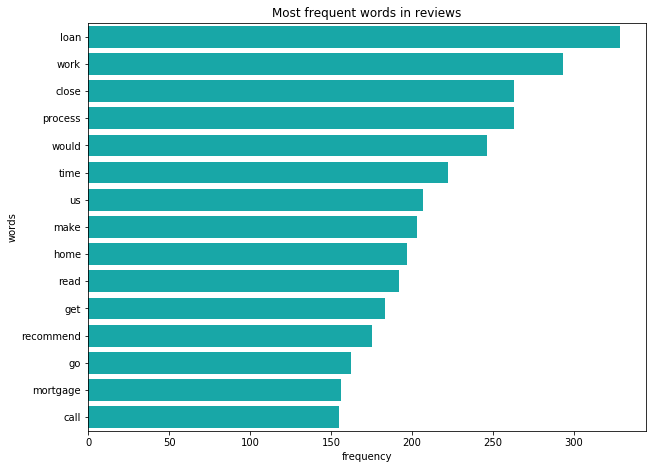

In [45]:
# creating a dataframe for the most frequent words
word2count_df = pd.DataFrame(word2count.items(), columns = ['words', 'word_count'])
word2count_df = word2count_df.sort_values('word_count', ascending = False).reset_index(drop = True)
freq_words = word2count_df.head(15)

# graphical representation of the most frequent words
sns.barplot(x='word_count', y='words', data=freq_words, color='c')
plt.title('Most frequent words in reviews')
plt.xlabel('frequency')
plt.ylabel('words')
plt.show()

___

## SENTIMENT ANALYSIS

In [16]:
# importing required library to perform sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# giving a sentiment intensity score.
analyser = SentimentIntensityAnalyzer()

def sentiment_pos(sentence):
    snt = analyser.polarity_scores(sentence)
    return snt['pos']

def sentiment_neg(sentence):
    snt = analyser.polarity_scores(sentence)
    return snt['neg']

def sentiment_neu(sentence):
    snt = analyser.polarity_scores(sentence)
    return snt['neu']

def sentiment_com(sentence):
    snt = analyser.polarity_scores(sentence)
    return snt['compound']

- <h3> FINDING KEY POSITIVE AND NEGATIVE WORDS

In [17]:
word2count_df['Positive'] = word2count_df['words'].apply(sentiment_pos)
word2count_df['Negative'] = word2count_df['words'].apply(sentiment_neg)
word2count_df.head()

,words,word_count,Positive,Negative
0,loan,328,0.0,0.0
1,work,293,0.0,0.0
2,close,263,0.0,0.0
3,process,263,0.0,0.0
4,would,246,0.0,0.0


<h4> KEY POSITIVE WORDS

In [18]:
# list of positive words
word2count_df.loc[word2count_df['Positive'] > 0]['words']

11        recommend
15            great
22            thank
26             best
28             help
           ...     
2070       favorite
2072           tgif
2081    considerate
2087      favorable
2099     empathetic
Name: words, Length: 247, dtype: object

<h4> KEY NEGATIVE WORDS

In [19]:
# list of negative words
word2count_df.loc[word2count_df['Negative'] > 0]['words']  

65                pay
97               hard
121              poor
177         stressful
184             lower
            ...      
2027             drop
2028         paranoid
2047    misunderstand
2052    uncomfortable
2055     unacceptable
Name: words, Length: 133, dtype: object

- <h3> CLASSIFICATION OF REVIEWS INTO POSITIVE, NEGATIVE AND NEUTRAL

In [20]:
# giving a sentiment intensity score to reviews.
bank_reviews['Positive'] = bank_reviews['Reviews'].apply(sentiment_pos)
bank_reviews['Negative'] = bank_reviews['Reviews'].apply(sentiment_neg)
bank_reviews['Neutral'] = bank_reviews['Reviews'].apply(sentiment_neu)

In [21]:
bank_reviews.head()

,Stars,Reviews,BankName,Reviews_clean,Positive,Negative,Neutral
0,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,"[great, job, wyndham, capital, person, profess...",0.297,0.000,0.703
1,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,"[matthew, richardson, professional, helpful, h...",0.297,0.000,0.703
2,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,"[past, experience, wyndham, mortgage, would, w...",0.206,0.000,0.794
3,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,"[deal, brad, thomka, begin, start, stressful, ...",0.226,0.018,0.756
4,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,"[cant, express, grateful, support, zach, provi...",0.099,0.040,0.861


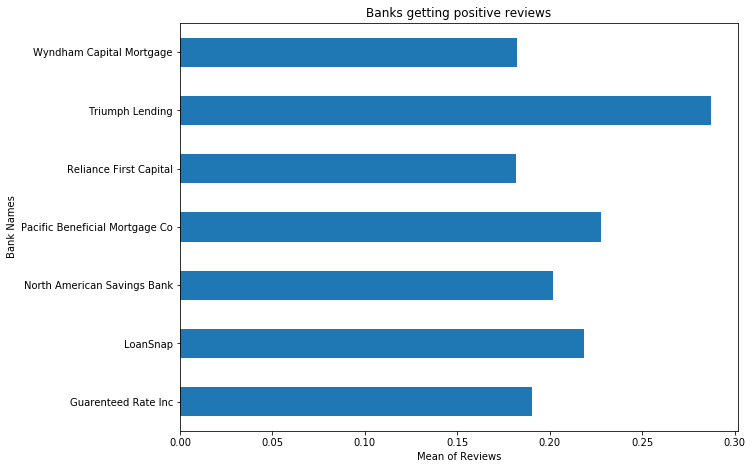

In [46]:
# graphical representation of banks getting positive reviews
bank_reviews.groupby('BankName')['Positive'].mean().plot(kind='barh')
plt.title('Banks getting positive reviews')
plt.xlabel('Mean of Reviews')
plt.ylabel('Bank Names')
plt.show()

> **Triumph Lending bank** is outperforming in getting positive reviews as compared to other banks.

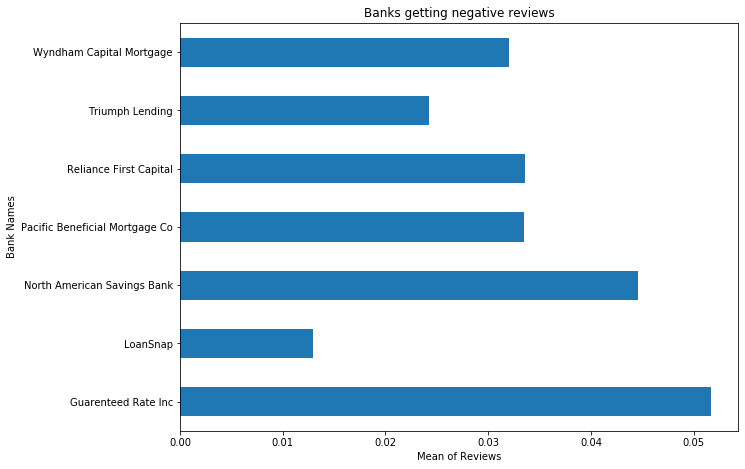

In [47]:
# graphical representation of banks getting negative reviews
bank_reviews.groupby('BankName')['Negative'].mean().plot(kind='barh')
plt.title('Banks getting negative reviews')
plt.xlabel('Mean of Reviews')
plt.ylabel('Bank Names')
plt.show()

> **'Guarenteed Rate Inc Bank'** and **'North American Savings Bank'** is getting more number of negative reviews as compared to other banks.

___

## IDENTIFY KEY THEMES OF PROBLEMS

## CLUSTERING

> Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

- ## K-Means
> **K-means clustering algorithm** – It is the simplest unsupervised learning algorithm that solves clustering problem. K-means algorithm partition n observations into k clusters where each observation belongs to the cluster with the nearest mean serving as a prototype of the cluster .

In [24]:
# importing required libraries
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# getting the negative reviews because we have to identify key themes of probelems
problems = bank_reviews.loc[bank_reviews['Negative'] > 0]['Reviews']

### VECTORIZING RAW DATA : TF-IDF

>Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.

In [26]:
# creating vectorizer using TfidfVectorizer class to fit and transform the Reviews
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(problems)

In [27]:
# implement our k-means clustering algorithm
true_k = 3
model = KMeans(n_clusters = true_k, init = 'k-means++', max_iter = 100, n_init = 1, random_state = 42)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [28]:
# getting the centroids and features
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [29]:
# the centroids into which clusters they belongs
for i in range(true_k):
     print('\n\nCluster %d:' % i)
     for ind in order_centroids[i, :10]:
         print('\t -  %s' % terms[ind])



Cluster 0:
	 -  loan
	 -  make
	 -  kory
	 -  worked
	 -  thanks
	 -  time
	 -  nasb
	 -  best
	 -  fred
	 -  home


Cluster 1:
	 -  time
	 -  closing
	 -  loan
	 -  did
	 -  process
	 -  great
	 -  read
	 -  rate
	 -  weeks
	 -  good


Cluster 2:
	 -  process
	 -  loan
	 -  mortgage
	 -  recommend
	 -  company
	 -  service
	 -  team
	 -  highly
	 -  home
	 -  adam


In [30]:
# predicting the text sentence which can tell us in which cluster the sentence belongs to
X = vectorizer.transform(bank_reviews.Reviews)
predicted = model.predict(X)
bank_reviews['clusters'] = predicted
bank_reviews.head()

,Stars,Reviews,BankName,Reviews_clean,Positive,Negative,Neutral,clusters
0,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,"[great, job, wyndham, capital, person, profess...",0.297,0.000,0.703,2
1,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,"[matthew, richardson, professional, helpful, h...",0.297,0.000,0.703,2
2,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,"[past, experience, wyndham, mortgage, would, w...",0.206,0.000,0.794,2
3,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,"[deal, brad, thomka, begin, start, stressful, ...",0.226,0.018,0.756,2
4,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,"[cant, express, grateful, support, zach, provi...",0.099,0.040,0.861,2


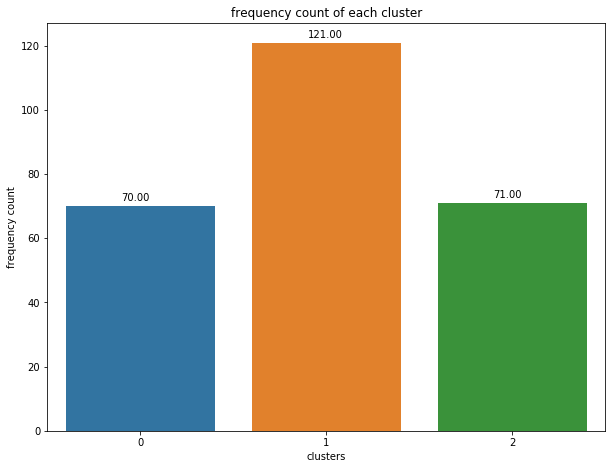

In [48]:
# graphical representation of frequency count of each cluster
ax = sns.countplot(model.labels_)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1.5))

plt.title('frequency count of each cluster')
plt.xlabel('clusters')
plt.ylabel('frequency count')
plt.show()

___

## PREDICTING STAR RATING USING REVIEWS

- <h3> CREATING TF-IDF MODEL

>- **tf-idf** stands for **Term frequency-inverse document frequency**. The tf-idf weight is a weight often used in information retrieval and text mining. Variations of the tf-idf weighting scheme are often used by search engines in scoring and ranking a document’s relevance given a query. 
- This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. 
- The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus (data-set).

In [32]:
# creating the Tf-Idf model
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.8)
X = vectorizer.fit_transform(bank_reviews.Reviews).toarray()

#### LOGISTIC REGRESSION TECHNIQUE

In [33]:
from sklearn.model_selection import train_test_split  

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, bank_reviews.Stars, test_size = .3, random_state = 42)

In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=4.0, random_state=42)

logreg.fit(X_train, y_train)

LogisticRegression(C=4.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
from sklearn import metrics

# evalution of train and test accuracy
train_accuracy = metrics.accuracy_score(y_train, logreg.predict(X_train))
print('train_accuracy: ',train_accuracy)

test_accuracy = metrics.accuracy_score(y_test, logreg.predict(X_test))
print('test_accuracy: ',test_accuracy)

train_accuracy:  0.9688385269121813
test_accuracy:  0.9210526315789473


In [36]:
# roc_auc_score
train_roc_auc = metrics.roc_auc_score(y_train, logreg.predict(X_train))
print('Roc Auc Score of training dataset: ', train_roc_auc)

test_roc_auc = metrics.roc_auc_score(y_test, logreg.predict(X_test))
print('Roc Auc Score of testing dataset: ', test_roc_auc)

Roc Auc Score of training dataset:  0.9163204581181227
Roc Auc Score of testing dataset:  0.8444666001994018


In [37]:
from sklearn import metrics

# creating a confusion matrix
cm = metrics.confusion_matrix(y_test, logreg.predict(X_test), [1,5] )
cm

array([[ 24,  10],
       [  2, 116]])

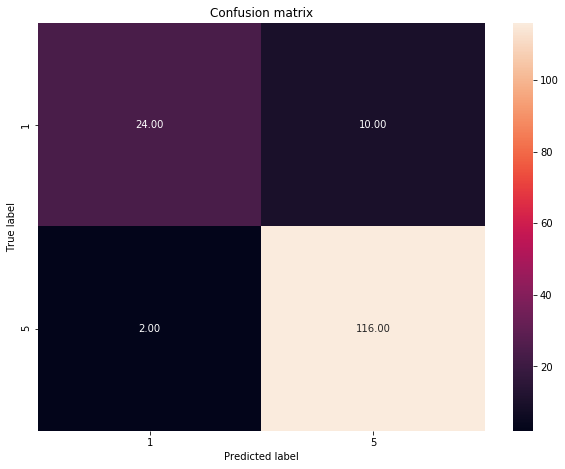

In [49]:
# visualizing Confusion Matrix using Heatmap
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=["1", "5"], yticklabels=["1", "5"])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.autoscale(enable=True, axis='y')

> - The model predicted 24 star ratings as 1 which were actually 1 and 116 ratings as 5 which were actually 5 but the model predicted 2 ratings as 1 which were actually 5 and and 10 ratings as 5 which were actually 1. <br><br>
> - Hence, Our model predicted Star ratings with **96% accuracy** which is quite good.

### FINAL PREDICTION

In [39]:
# Concatenating final prediction with original data set(all obersvations):
pred_stars = pd.DataFrame(logreg.predict(X), columns = ['predicted_stars'])
submission = pd.concat([bank_reviews, pred_stars], axis=1)

In [40]:
submission.head()

,Stars,Reviews,BankName,Reviews_clean,Positive,Negative,Neutral,clusters,predicted_stars
0,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,"[great, job, wyndham, capital, person, profess...",0.297,0.000,0.703,2,5
1,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,"[matthew, richardson, professional, helpful, h...",0.297,0.000,0.703,2,5
2,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,"[past, experience, wyndham, mortgage, would, w...",0.206,0.000,0.794,2,5
3,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,"[deal, brad, thomka, begin, start, stressful, ...",0.226,0.018,0.756,2,5
4,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,"[cant, express, grateful, support, zach, provi...",0.099,0.040,0.861,2,5


In [41]:
# submitting final file
submission.to_csv('Submission', index=False)

<center> <h1> END

___